# Part 1: Build an initial model

In [1]:
train = read.csv("TitanicTrain.csv")
train <- na.omit(train)
fix(train)

In [2]:
summary(train)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:714        
 1st Qu.:222.2   1st Qu.:0.0000   1st Qu.:1.000   Class :character  
 Median :445.0   Median :0.0000   Median :2.000   Mode  :character  
 Mean   :448.6   Mean   :0.4062   Mean   :2.237                     
 3rd Qu.:677.8   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
     Sex                 Age            SibSp            Parch       
 Length:714         Min.   : 0.42   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.0000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.0000   Median :0.0000  
                    Mean   :29.70   Mean   :0.5126   Mean   :0.4314  
                    3rd Qu.:38.00   3rd Qu.:1.0000   3rd Qu.:1.0000  
                    Max.   :80.00   Max.   :5.0000   Max.   :6.0000  
    Ticket               Fa

In [3]:
train$Sex = as.factor(train$Sex)
train$Pclass = as.factor(train$Pclass)

In [4]:
model = glm(Survived~Sex+Age+Pclass, family="binomial", data=train)
summary(model)


Call:
glm(formula = Survived ~ Sex + Age + Pclass, family = "binomial", 
    data = train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.777013   0.401123   9.416  < 2e-16 ***
Sexmale     -2.522781   0.207391 -12.164  < 2e-16 ***
Age         -0.036985   0.007656  -4.831 1.36e-06 ***
Pclass2     -1.309799   0.278066  -4.710 2.47e-06 ***
Pclass3     -2.580625   0.281442  -9.169  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 964.52  on 713  degrees of freedom
Residual deviance: 647.28  on 709  degrees of freedom
AIC: 657.28

Number of Fisher Scoring iterations: 5


In [5]:
glm.probs=predict(model,type="response")
glm.pred=rep(0,nrow(train))
glm.pred[glm.probs >0.5]=1
table(glm.pred ,train$Survived)
mean(glm.pred==train$Survived)

        
glm.pred   0   1
       0 356  83
       1  68 207

[1] 0.7885154

In [7]:
library (car)
print(vif(model))

           GVIF Df GVIF^(1/(2*Df))
Sex    1.072870  1        1.035794
Age    1.333112  1        1.154605
Pclass 1.416574  2        1.090962


I eventually ended up with logisitc regression with the variables Sex, Age, and Pclass as my model. I first tried a decision tree and random forest approach but the accuracy was < 70% on the training sample. I also tried using K-Nearest neighbors, but it also didn't perform too well. For logisitc regression, I decided to use Sex, Age, and Pclass because I thought they would be the most significant in predicting survival. I tried some other variables but they weren't as significant. All the predictors in this model are significant to 0.1% which is extremely good. Additionally all the VIFs (and adjusted VIFs) are < 2 indicting little to no multicollinearity.

# Part 2: Residual Analysis

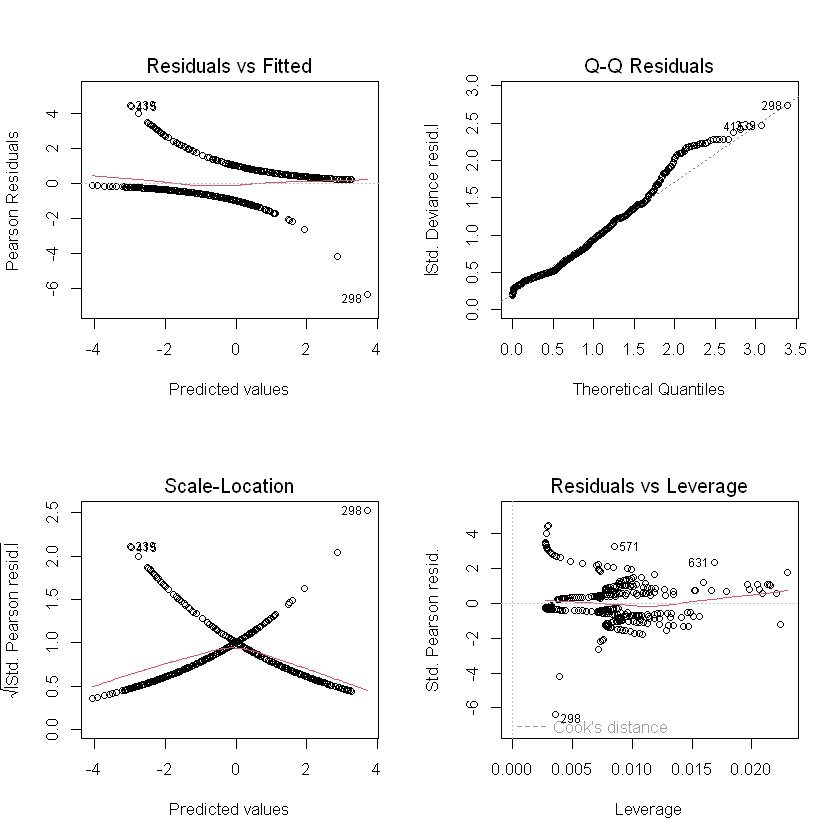

In [8]:
par(mfrow=c(2,2))
plot(model)

In [9]:
sresid = rstudent(model)
lev = hatvalues(model)
cook = cooks.distance(model)

In [10]:
print(sresid[which.max(abs(sresid))])

      298 
-2.756722 


In [11]:
print(lev[which.max(abs(lev))])

       484 
0.02295272 


In [12]:
print(cook[which.max(abs(cook))])

       298 
0.02904976 


Looking at the graph, we see that the residuals match what we would expect from a logistic regression. The top band indiactes a true of 1 which curves to 0 as the prediction goes from 0 to 1. Similarly, the bottom band indicates a true value of 0 which curves downward from 0 as the prediction increases. The QQ plot also is relatively linear indicating that the residuals are somewhat normally distributed (and deviations from normality is to be expected in logistic regression).

The largest studentized residual is -2.76 which is high but it is < 3 so it doesn't pose a huge problem.

The largest leverage is 0.023 which is slightly above the threshhold of 3 * (# of var)/n and is an outlier that could influence the fit.

The largest Cook's distance is 0.029 which is extremely small and means that the overall influence of all points is not significant.

The results suggest removing data points 298 and 484 to get a better model.

In [13]:
train = train[-c(298, 484),]
nrow(train)
model = glm(Survived~Sex+Age+Pclass, family="binomial", data=train)
summary(model)

glm.probs=predict(model,type="response")
glm.pred=rep(0,nrow(train))
glm.pred[glm.probs >0.457777]=1
table(glm.pred ,train$Survived)
mean(glm.pred==train$Survived)

[1] 712


Call:
glm(formula = Survived ~ Sex + Age + Pclass, family = "binomial", 
    data = train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.772411   0.400982   9.408  < 2e-16 ***
Sexmale     -2.518634   0.207387 -12.145  < 2e-16 ***
Age         -0.036952   0.007653  -4.828 1.38e-06 ***
Pclass2     -1.308652   0.277937  -4.708 2.50e-06 ***
Pclass3     -2.574697   0.281459  -9.148  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 962.43  on 711  degrees of freedom
Residual deviance: 646.89  on 707  degrees of freedom
AIC: 656.89

Number of Fisher Scoring iterations: 5


        
glm.pred   0   1
       0 348  62
       1  74 228

[1] 0.8089888

# Part 3: Cross-validation

In [14]:
test = read.csv("TitanicTest.csv")
test = na.omit(test)
fix(test)

In [15]:
test$Sex = as.factor(test$Sex)
test$Pclass = as.factor(test$Pclass)

In [16]:
glm.test=predict(model,newdata=test,type="response")
glm.pred_test=rep(0,nrow(test))
glm.pred_test[glm.test >.5]=1

table(glm.pred_test,test$Survived)
mean(glm.pred_test==test$Survived)

             
glm.pred_test   0   1
            0 148  38
            1  45  88

[1] 0.7398119

The test model has around 74% accuracy which is pretty good!

## Part (a)

In [17]:
test_resid = test$Survived - glm.test
mean(test_resid)
sd(test_resid)

[1] -0.04088939

[1] 0.4112215

In [18]:
train_resid = train$Survived - glm.probs
mean(train_resid)
sd(train_resid)

[1] -5.760508e-16

[1] 0.37894

The mean and standard deciation from the test set closely matches the corresponding values in the training set (mean is around 0 and std. dev is around 0.4)

## Part (b)

In [19]:
test_sresid = test_resid/sd(test_resid)
print(test_sresid[which.max(abs(test_sresid))])

    261 
2.27423 


Computing the studentized residual we see that the largest value is 2.27 which is less than 3 so there are no outlier holdout cases.

## Part (c)

In [20]:
train_r2 = cor(glm.probs, train$Survived)^2
test_cor = cor(glm.test, test$Survived)
test_r2 = test_cor^2
shrinkage = train_r2 - test_r2


print(train_r2)
print(test_cor)
print(test_r2)
print(shrinkage)

[1] 0.4060841
[1] 0.5470174
[1] 0.299228
[1] 0.106856


The test correlation is 0.55 and the shrinkage is 0.11 which I think is small enough to say that the model predicts fairly well.

# Part 4: Final Model

In [21]:
summary(model)


Call:
glm(formula = Survived ~ Sex + Age + Pclass, family = "binomial", 
    data = train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.772411   0.400982   9.408  < 2e-16 ***
Sexmale     -2.518634   0.207387 -12.145  < 2e-16 ***
Age         -0.036952   0.007653  -4.828 1.38e-06 ***
Pclass2     -1.308652   0.277937  -4.708 2.50e-06 ***
Pclass3     -2.574697   0.281459  -9.148  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 962.43  on 711  degrees of freedom
Residual deviance: 646.89  on 707  degrees of freedom
AIC: 656.89

Number of Fisher Scoring iterations: 5


In [ ]:
pred = exp(3.772411 - 2.518634*Sexmale -0.036952*Age -1.308652*Pclass2 - 2.574697*Pclass3)/(1+exp(3.772411 - 2.518634*Sexmale -0.036952*Age -1.308652*Pclass2 - 2.574697*Pclass3))

Sexmale is 1 if male and 0 if female. Pclass2 is 1 if Pclass is 2 and 0 otherwise and similarly, Pclass3 is 1 if Pclass is 3 and 0 otherwise:

In [23]:
contrasts(train$Pclass)

,2,3
1,0,0
2,1,0
3,0,1


# Extra Credit: Precision and Recall

In [24]:
table(glm.pred,train$Survived)

        
glm.pred   0   1
       0 348  62
       1  74 228

In [26]:
train_precision = 348/(348+62)
train_recall = 348/(348+74)

print(train_precision)
print(train_recall)

[1] 0.8487805
[1] 0.8246445


In [25]:
table(glm.pred_test,test$Survived)

             
glm.pred_test   0   1
            0 148  38
            1  45  88

In [27]:
test_precision = 148/(148+38)
test_recall = 148/(148+45)

print(test_precision)
print(test_recall)

[1] 0.7956989
[1] 0.7668394


The precision and recall are both higher than the accuracy of the model and tell us the proportion of correct guess when the model predicts a death and how well a model predicts a death respectively.